# Intro
## information about the protocol

$X \in [1;75]$

Looming $\quad X \in[1;47]$

Rotation $\quad X \in ]47;60]$

stationary $\quad X \in[61;75]$

\begin{array} {|r|l|l|} \hline Y & looming & rotation \\ 
\hline
1 & left & clkw \\
2 & left & counter-clkw \\
3 & left & None \\
4 & right & clkw \\
5 & right & counter-clkw \\
6 & right & None \\
7 & None & clkw \\
8 & None & counter-clkw \\
\hline \end{array}

Left/right is viewed from the fly's perspective and was last checked on 5.2.2020

# Setup

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? 
Nothing done.


In [7]:
import os
from pathdefs import *
os.chdir(SOURCEPATH)
import Looming_with_background_Analyzer as lwb
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy import stats
from scipy import stats

import helperLibrary


In [8]:
%matplotlib notebook

In [9]:
#For information on why some have been chosen/excluded, c.f. the file Loomng_wb_evaluationSummary.xslx

frequentflyers = [('2020_04_20',"Fly4_X21_age_3d_cell1_"),   
            ("2020_04_17","Fly3_X21_age_5d_cell1_"), 
            ("2020_04_15","Fly3_X21_age_3d_cell1_"), 
            ("2020_03_16","Fly1_X20a_age_3d_cell1_"),
            ("2020_01_29","Fly1_U29xG16_age_5d_cell1_"),
            ("2020_01_29","Fly3_U29xG16_age_5d_cell1_"),
            ("2019_12_09","Fly1_U29xG16_age_2d_cell2_"),
            ("vonBettina/06112019_CS",'Fly1_WTCS_age_3d_cell1_'),   
            ('vonBettina/04112019_G06',"Fly1_G06xU29_age_3d_cell1_"),
            ("vonBettina/26072019_CS","Fly1_WTCS_age_3d_cell1_"),
            ("vonBettina/25072018_CS","Fly1_WTCS_age_3d_cell1_")
           ]

# Analysis
## single file

In [10]:
folder = 'D:/RecorderData/vonBettina/25072018_CS/'
fname = 'Fly1_WTCS_age_3d_cell1_Looming_wb_2018_07_25_10_24_02.mat'

<IPython.core.display.Javascript object>


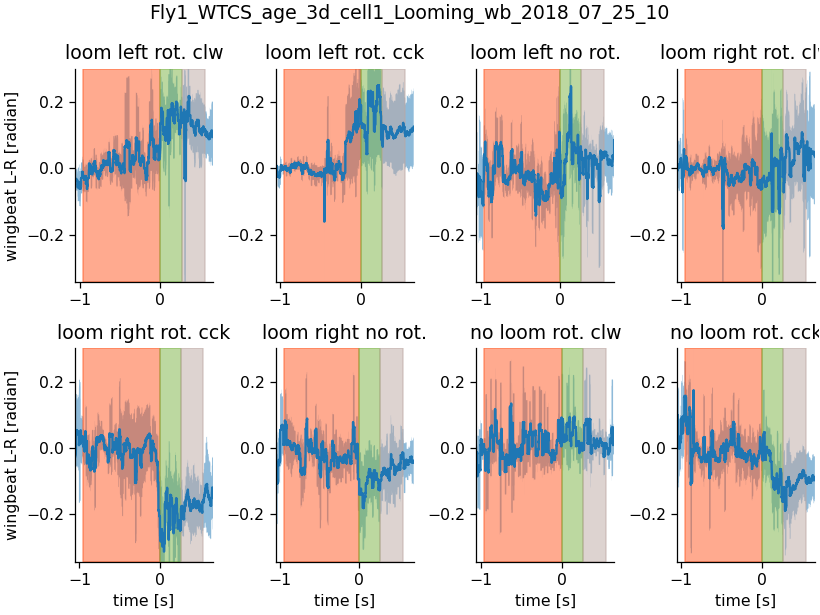

In [11]:
anlyz = lwb.Looming_with_background_Analyzer(os.path.join(folder,fname))
anlyz.plotMean()

<IPython.core.display.Javascript object>


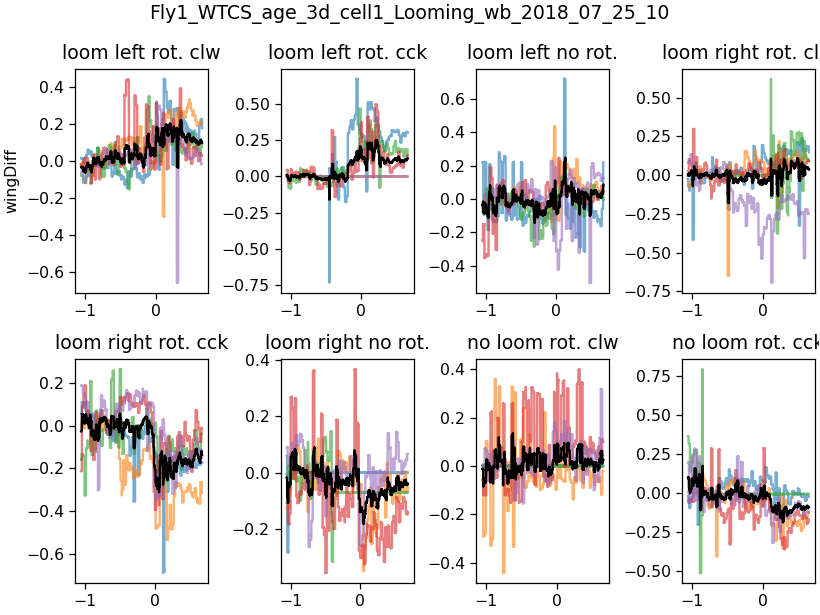

<IPython.core.display.Javascript object>


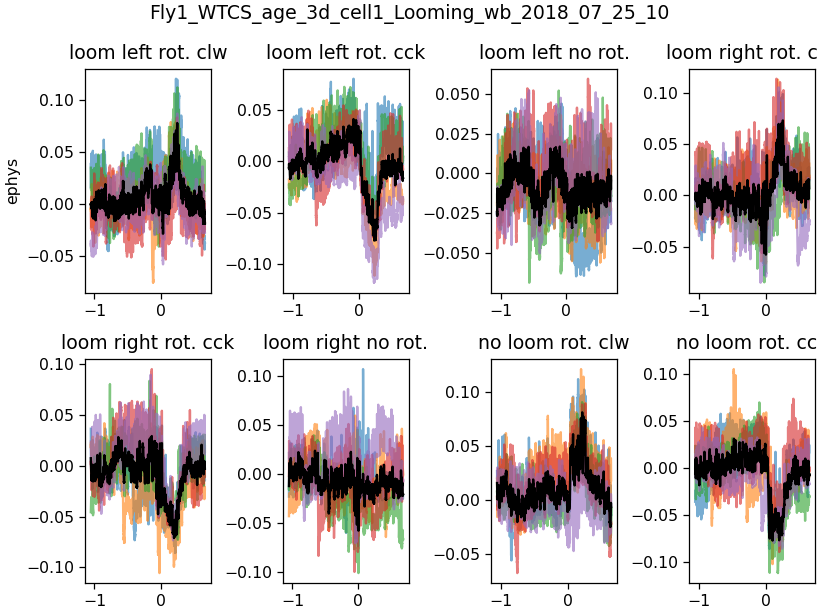

<IPython.core.display.Javascript object>


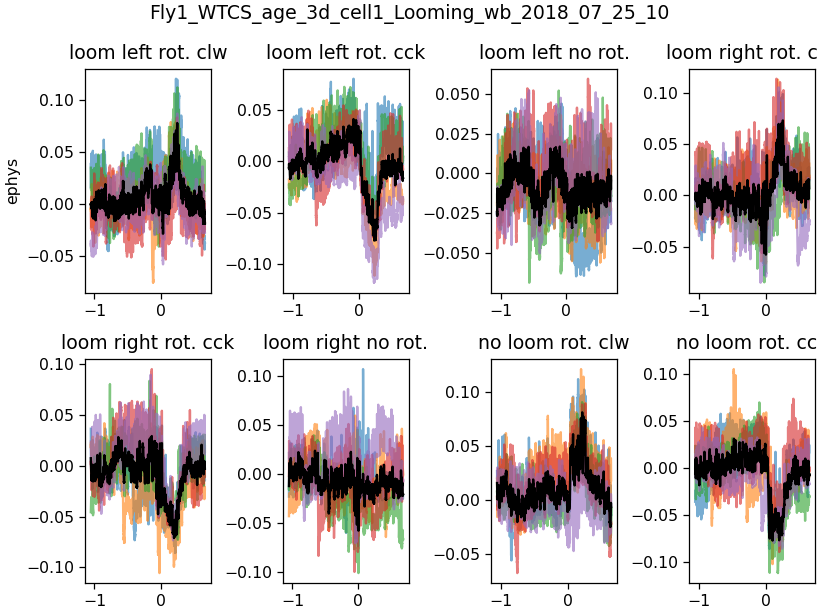

In [12]:
anlyz.plot_by_stimSignal('wingDiff')
anlyz.plot_by_stimSignal('ephys')

## batch loading
This is usual entry point, which is meant to load all the files belonging to a certain individual. To select the right individual, there are a number of criteria in the loop, operating on the file name.

In [13]:
folder = '2020_03_10'
path=os.path.join(DATAPATH, folder)
blacklist=[] #certain files to exclude, e.g. lost cell halfway through or very noisy

i=0
doneList=[]
for root,dirs,files in os.walk(path):
    print(files)
    for f in files:
        f_checks=f.lower()
        #if not f.endswith('filteredWings.mat'):
        if not 'fly1' in f_checks:    continue
        if not 'cell1' in f_checks:    continue
        if not f_checks.endswith('.mat'):    continue
        if not 'looming_wb' in f_checks:    continue
        if 'coveredarena' in f_checks:    continue
        if f[:-4] in blacklist:    continue
        if f[:-4] in doneList:    continue
        #find if there are filtered versions
        if f[:-4] +'___filteredWings.mat' in files:
            if f[:-4] +'___filteredWings.mat' in blacklist:
                continue
            doneList.append(f)
            f = f[:-4] +'___filteredWings.mat'
            doneList.append(f)#this one too
        print(f)
        a = lwb.Looming_with_background_Analyzer(os.path.join(root,f))
        if i==0:
            sumAnlyz = a
        else:
            sumAnlyz = sumAnlyz + a
        i+=1
        doneList.append(f[:-4]) #to avoid double-dipping if something went wrong
        print('ran through')

['Fly1_X21_age_3d_cell1_direction_tuning_2020_03_10_16_51_11.mat', 'Fly1_X21_age_3d_cell1_direction_tuning_2020_03_10_16_51_11__log.txt', 'Fly1_X21_age_3d_cell1_looming_wb_2020_03_10_16_52_01.mat', 'Fly1_X21_age_3d_cell1_looming_wb_2020_03_10_16_52_01__log.txt', 'Fly1_X21_age_3d_cell1_looming_wb_2020_03_10_16_55_52.mat', 'Fly1_X21_age_3d_cell1_looming_wb_2020_03_10_16_55_52__log.txt', 'Fly1_X21_age_3d_cell1_looming_wb_2020_03_10_16_59_07.mat', 'Fly1_X21_age_3d_cell1_looming_wb_2020_03_10_16_59_07__log.txt', 'Fly1_X21_age_3d_cell1_looming_wb_2020_03_10_17_02_20.mat', 'Fly1_X21_age_3d_cell1_looming_wb_2020_03_10_17_02_20__log.txt', 'Fly1_X21_age_3d_cell1_looming_wb__flying.neomat', 'Fly1_X21_age_3d_cell1_looming_wb__resting.neomat', 'Fly1_X21_age_3d_cell1_receptiveField_HS.png', 'Fly1_X21_age_3d_cell1_receptiveField_HS_2020_03_10_17_06_42.mat', 'Fly1_X21_age_3d_cell1_receptiveField_HS_2020_03_10_17_06_42__log.txt', 'Fly1_X21_age_3d_cell1_receptiveField_HS_2020_03_10_17_13_14.mat', 'Fly1_

<IPython.core.display.Javascript object>


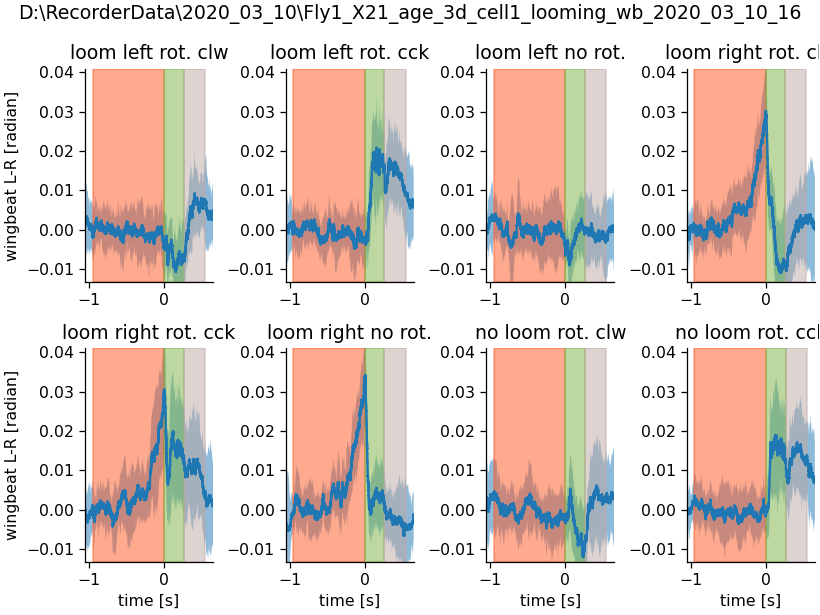

<IPython.core.display.Javascript object>


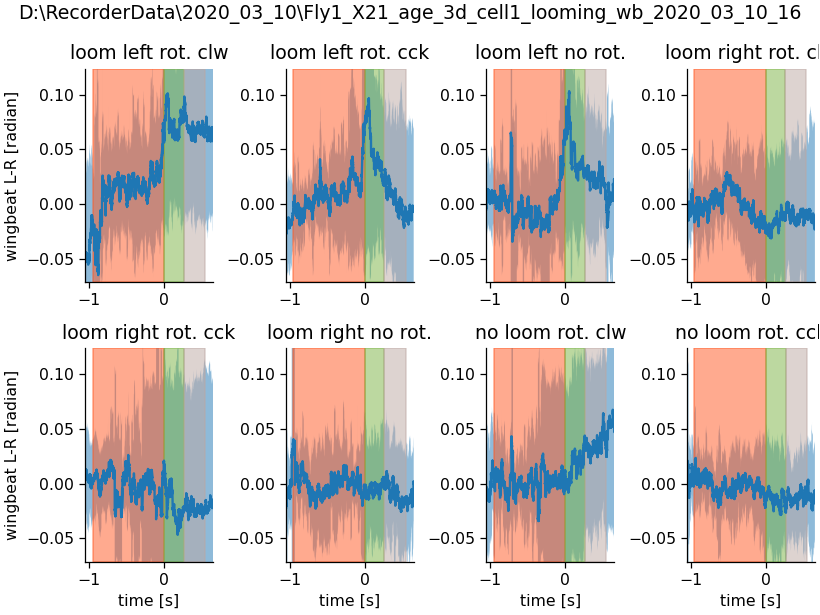

In [69]:
sumAnlyz.plotMean('ephys')
sumAnlyz.plotMean('wingDiff')

## separate flying from non-flying

It it easy to separate the trials where there is absolutely no flying by the extremely low standard deviation and mean. The average WSA in flight is actually quite variable depending on tether angle and Kinefly configuration.

Hartigans Dip test was tested to distinguish the trials that are problematic, aka a lot of detection noise or stopped flying. However that does not give any meaningful results.

##### reasons to discard certain trials
Discard a trial when the wings fulfill one of the following criteria:
- fly starts or stops flying during trial (partially no wingbeat)
- both wings very close to or even below 0 (wings too low)
- too many misdetections (more than 2 or 3 in a trial)
- misdetections around crucial moment where looming expansion is maximal -> therefore be strict with misdetections

This has proven valid in most cases, so **use this**. Adjust theta if necessary.

The idea is to decide which trials were clearly non-flying, and which are clearly flying, because these two are easier. Then we simply reject all the ones that are neither.

First, we take a look at the wing stroke amplitude histogram to see what a meaningful threshold could be. Kinefly tends to always misdetect the same false line in the picture as wings, so the misdetection angle is always roughly the same, and that shows in the histogram as a secondary peak.

Then, we set a threshold for wing left and right, and count the data points that cross it. 


In [27]:
anlyz = sumAnlyz #when using batch loading

<IPython.core.display.Javascript object>


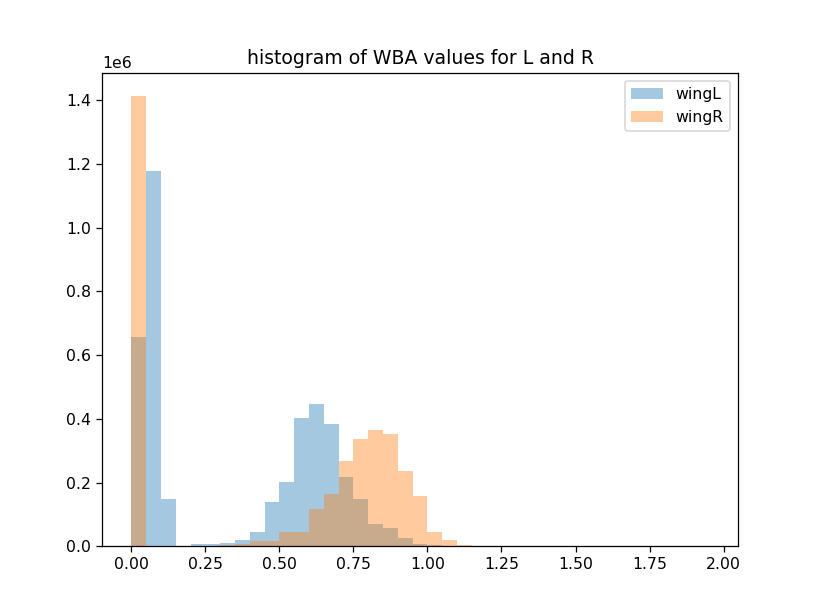

In [28]:
f,ax=plt.subplots(1,1)

d1 = np.concatenate([s.data[sumAnlyz.channelmap['wingL']] for s in anlyz.segments])
d2 = np.concatenate([s.data[sumAnlyz.channelmap['wingR']] for s in anlyz.segments])
ax.hist(d1, bins=np.arange(0,2.0,0.05), alpha=0.4)
ax.hist(d2, bins=np.arange(0,2.0,0.05), alpha=0.4)
ax.set_title('histogram of WBA values for L and R')
ax.legend(['wingL','wingR'])

<IPython.core.display.Javascript object>


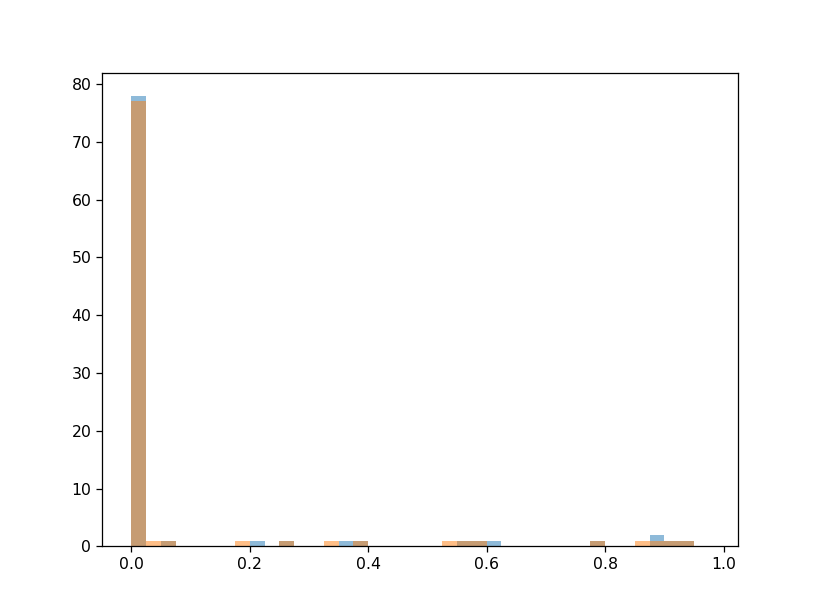

<IPython.core.display.Javascript object>


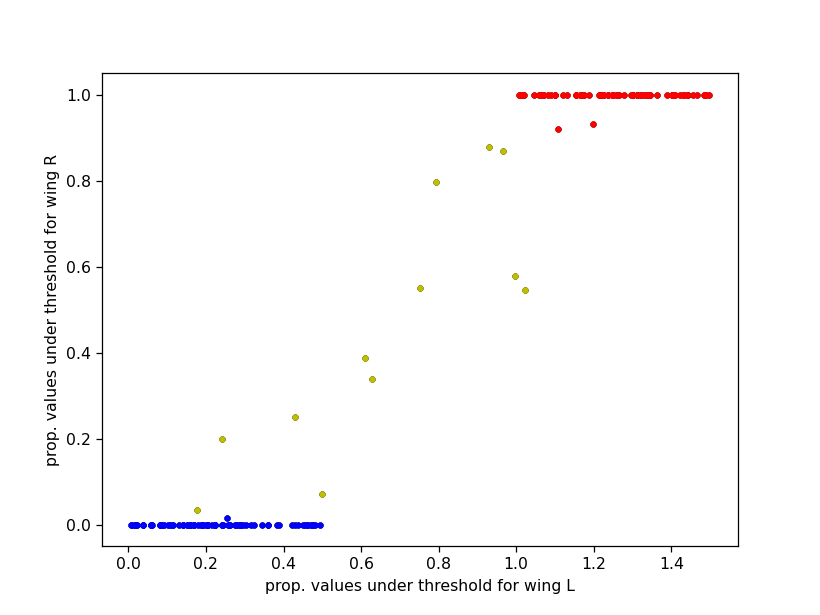

Text(0, 0.5, 'prop. values under threshold for wing R')

In [30]:
## VERY SIMPLE YET EFFECTIVE METHOD, COUNTING THRESHOLDED VALUES AND THRESHOLD THAT
theta_L = 0.2
theta_R = 0.2
upperLimit = 1.7 #usually, very high values are unnatural and clearly noise, but in some cases it's right; think

t1= np.array([np.sum(np.logical_or(s.data[anlyz.channelmap['wingL']] > 1.7 ,
                                   s.data[anlyz.channelmap['wingL']]<theta_L) ) for s in anlyz.segments])
t2= np.array([np.sum(np.logical_or(s.data[anlyz.channelmap['wingR']] > 1.7 ,
                                   s.data[anlyz.channelmap['wingR']]<theta_R) ) for s in anlyz.segments])
# t2= np.array([np.sum(np.logical_or(anlyz.segments[i].data[2] > 3.35 ,
#                                    anlyz.segments[i].data[2]<theta_2) ) for i in range(anlyz.segments.size)])

segmentLengths = np.array([s.data.shape[1] for s in anlyz.segments]) #to divide by length (which is quite uniform)

f,ax=plt.subplots(1,1)
ax.hist(t1/segmentLengths,alpha=0.5, bins=np.arange(0,1,0.025))
ax.hist(t2/segmentLengths,alpha=0.5, bins=np.arange(0,1,0.025))

f,ax=plt.subplots(1,1)
jitterForPlotting = np.random.rand(len(t1))/2
ax.plot(t1/segmentLengths+jitterForPlotting,  t2/segmentLengths,'k.')
ax.set_xlabel('prop. values under threshold for wing L')
ax.set_ylabel('prop. values under threshold for wing R')

In [31]:
# COLORIZE data points (trials) that are (almost) all below threshold (nf=non-flying)
discrepancyTol = [max(sl*0.02, 0.05*anlyz.samplingRate) for sl in segmentLengths]
nf = np.where(np.logical_and(np.abs(t1-t2)<discrepancyTol, t1>segmentLengths*0.9))[0]
ax.plot(t1[nf]/segmentLengths[nf]+jitterForPlotting[nf], t2[nf]/segmentLengths[nf],'r.')
nf

array([  1,   3,   7,   8,  12,  14,  15,  18,  19,  20,  21,  22,  23,
        24,  29,  31,  33,  35,  36,  39,  41,  42,  44,  47,  50,  52,
        53,  54,  63,  65,  66,  68,  69,  75,  76,  78,  80,  82,  85,
        86,  91,  92,  93,  95,  96,  97,  99, 101, 102, 103, 105, 106,
       107, 117, 118, 119, 122, 124, 125, 129, 130, 136, 140, 141, 144,
       147, 148, 151, 156, 157, 159], dtype=int64)

In [32]:
# COLORIZE data points (trials) that are all above threshold (fl=flying)
## set tolerated discrepancy btw so-called noise left and right, 30ms is <2 frames
discrepancyTol = 0.03*anlyz.samplingRate
fl = np.where(np.logical_and(np.abs(t1-t2)<discrepancyTol, t1<0.03*anlyz.samplingRate))[0]
ax.plot(t1[fl]/segmentLengths[fl]+jitterForPlotting[fl], t2[fl]/segmentLengths[fl],'b.')
fl

array([  0,   4,   5,   6,   9,  10,  11,  13,  16,  25,  26,  27,  28,
        30,  32,  34,  37,  38,  40,  43,  45,  46,  48,  49,  51,  55,
        56,  58,  60,  61,  62,  64,  67,  70,  71,  72,  73,  74,  77,
        79,  81,  88,  90,  94,  98, 100, 104, 108, 109, 111, 112, 113,
       114, 115, 116, 120, 126, 127, 128, 132, 133, 134, 135, 137, 138,
       139, 142, 143, 145, 146, 149, 150, 152, 153, 154, 155, 158],
      dtype=int64)

In [34]:
# define junk trials (=jk) as remaining ones, and colorize in plot
jk = np.ones(sumAnlyz.segments.size, dtype=bool)
jk[nf]=False
jk[fl]=False
jk = np.nonzero(jk)[0]
ax.plot(t1[jk]/segmentLengths[jk]+jitterForPlotting[jk], t2[jk]/segmentLengths[jk],'y.')
jk

array([  2,  17,  57,  59,  83,  84,  87,  89, 110, 121, 123, 131],
      dtype=int64)

In [35]:
print(fl.size)
print(nf.size)
print(jk.size)

77
71
12


**check outcome visually**

<IPython.core.display.Javascript object>


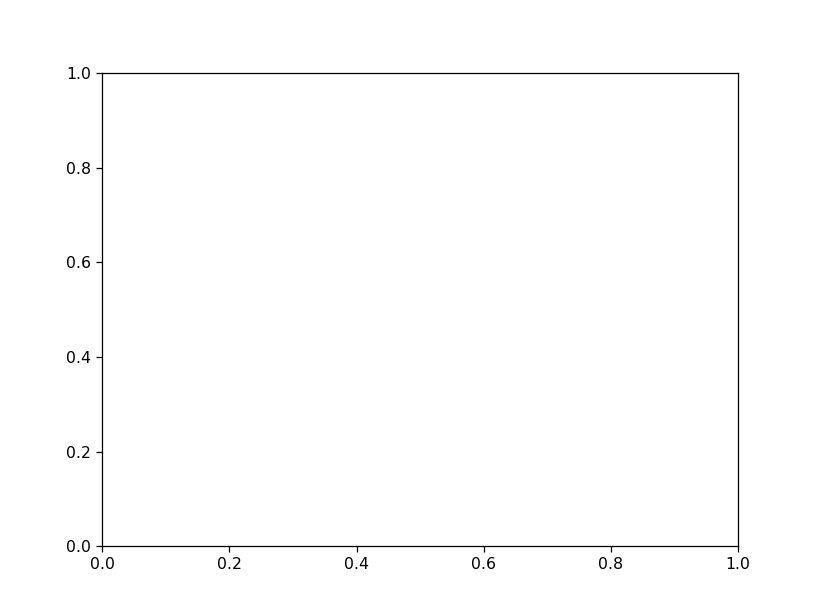

In [31]:
f,ax=plt.subplots(1,1)
plt.pause(3.)
for i in jk:
    ax.plot(sumAnlyz.segments[i].data[:3,:].T)
    #ax.set_title("{}   {:.2f}".format(i,res[i]*100))
    #plt.waitforbuttonpress()
    plt.pause(1.)
    ax.clear()

In [36]:
print('[' + ', '.join([str(n) for n in jk]) +']')
print('[' + ', '.join([str(n) for n in nf]) +']')
print('[' + ', '.join([str(n) for n in fl]) +']')

[2, 17, 57, 59, 83, 84, 87, 89, 110, 121, 123, 131]
[1, 3, 7, 8, 12, 14, 15, 18, 19, 20, 21, 22, 23, 24, 29, 31, 33, 35, 36, 39, 41, 42, 44, 47, 50, 52, 53, 54, 63, 65, 66, 68, 69, 75, 76, 78, 80, 82, 85, 86, 91, 92, 93, 95, 96, 97, 99, 101, 102, 103, 105, 106, 107, 117, 118, 119, 122, 124, 125, 129, 130, 136, 140, 141, 144, 147, 148, 151, 156, 157, 159]
[0, 4, 5, 6, 9, 10, 11, 13, 16, 25, 26, 27, 28, 30, 32, 34, 37, 38, 40, 43, 45, 46, 48, 49, 51, 55, 56, 58, 60, 61, 62, 64, 67, 70, 71, 72, 73, 74, 77, 79, 81, 88, 90, 94, 98, 100, 104, 108, 109, 111, 112, 113, 114, 115, 116, 120, 126, 127, 128, 132, 133, 134, 135, 137, 138, 139, 142, 143, 145, 146, 149, 150, 152, 153, 154, 155, 158]


In [37]:
sumAnlyz.fileOrigin

{0: 'D:\\RecorderData\\2020_03_10\\Fly1_X21_age_3d_cell1_looming_wb_2020_03_10_16_52_01.mat',
 1: 'D:\\RecorderData\\2020_03_10\\Fly1_X21_age_3d_cell1_looming_wb_2020_03_10_16_55_52.mat',
 2: 'D:\\RecorderData\\2020_03_10\\Fly1_X21_age_3d_cell1_looming_wb_2020_03_10_16_59_07.mat',
 3: 'D:\\RecorderData\\2020_03_10\\Fly1_X21_age_3d_cell1_looming_wb_2020_03_10_17_02_20.mat'}

In [38]:
#sumAnlyz.remove_duds_byList(jk)
nonflying = nf
flying = fl
toRemove=jk
sumAnlyz.flying[nonflying]=False

In [39]:
# CONVERT REMOVE INDICES FROM sumAnlyz TO saFly INDICES
targets = [j-np.sum(sumAnlyz.flying[:j]==False) for j in toRemove]

saFly,saRest = sumAnlyz.separate_flying_resting()
saFly.remove_duds_byList(targets)
sumAnlyz.remove_duds_byList(toRemove)

### Manual sorting alternative

Manually sort the trials in a GUI and pickle the result for later use

In [39]:
# separate using GUI
sumAnlyz.remove_duds(GUI=True)
#sumAnlyz_BAK = sumAnlyz

to remove:  [13, 37, 46, 49, 55, 58, 70, 85, 120, 139, 143, 149, 155, 156, 157, 186, 190, 191, 198]
not flying:  [1, 2, 3, 4, 10, 12, 14, 15, 16, 17, 18, 21, 25, 26, 27, 28, 29, 30, 34, 35, 38, 41, 42, 43, 44, 48, 50, 51, 52, 53, 54, 57, 60, 61, 62, 63, 64, 73, 74, 76, 77, 79, 80, 83, 87, 88, 89, 90, 91, 92, 99, 100, 101, 102, 103, 104, 105, 109, 113, 115, 116, 122, 125, 126, 127, 128, 129, 131, 132, 133, 135, 137, 145, 146, 147, 150, 153, 158, 159, 161, 162, 163, 164, 165, 166, 167, 168, 169, 174, 175, 176, 177, 178, 179, 181, 183, 188, 192, 199]


In [21]:
sumAnlyz.fileOrigin

{0: 'Fly1_WTCS_age_3d_cell1_looming_wb_2019_07_26_12_11_46.mat',
 1: 'Fly1_WTCS_age_3d_cell1_looming_wb_2019_07_26_12_14_59.mat',
 2: 'Fly1_WTCS_age_3d_cell1_looming_wb_2019_07_26_12_18_14.mat',
 3: 'Fly1_WTCS_age_3d_cell1_looming_wb_2019_07_26_12_21_37.mat',
 4: 'Fly1_WTCS_age_3d_cell1_looming_wb_2019_07_26_12_24_59.mat'}

## save/load resting & flying

In [40]:
#saRest.replace_numeric_keys(saRest.stimulusmap)
#sumAnlyz.retrieve_numeric_keys(sumAnlyz.fileOrigin)
sumAnlyz.metadata

{0: {'fly': 1,
  'cross': 'X21',
  'age': 3,
  'cell': 1,
  'stimprotocol': 'looming_wb',
  'year': 2020,
  'month': 3,
  'day': 10,
  'hour': 16,
  'minute': 52,
  'second': 1}}

In [41]:
saRest.print_N_stims_per_fly()
saFly.print_N_stims_per_fly()

		loom left rot. clw	loom left rot. cck	loom left no rot.	loom right rot. clw	loom right rot. cck	loom right no rot.	no loom rot. clw	no loom rot. cck
fly1_X21_20200310_cell1		9		11		8		8		11		9		6		9
		loom left rot. clw	loom left rot. cck	loom left no rot.	loom right rot. clw	loom right rot. cck	loom right no rot.	no loom rot. clw	no loom rot. cck
fly1_X21_20200310_cell1		9		9		10		12		5		10		11		11


### NeoIO alternative
Use the neo package now, because pickling is not a good idea for more than short-term storage for various reasons. C.f. https://neo.readthedocs.io/en/stable/ ,install latest from Github, rather than pip.

In [42]:
import re
m=re.search('20[1-2]\d_\d{2}_\d{2}', sumAnlyz.fileOrigin[0])
date=m.group()
froot = os.path.join(DATAPATH, date)
froot

'D:\\RecorderData\\2020_03_10'

In [44]:
fname = sumAnlyz.fileOrigin[0][:-23]
saRest.write2neomatfile(fname+'_resting.neomat')
saFly.write2neomatfile(fname+'_flying.neomat')

# if we want to keep going right now, reconvert these
saRest.retrieve_numeric_keys(saRest.stimulusmap)
saFly.retrieve_numeric_keys(saRest.stimulusmap)

### loading

In [43]:
# NEO IO 
folder = '2020_04_15'
fly = 'Fly2_G16xU29_age_1d_cell1'
froot = os.path.join(DATAPATH, folder)

print('will load the following file, please check:')
print(os.path.join(froot, fly+'_looming_wb__resting.neomat'))

will load the following file, please check:
D:\RecorderData\2020_04_15\Fly2_G16xU29_age_1d_cell1_looming_wb__resting.neomat


In [6]:
saRest = lwb.Looming_with_background_Analyzer.retrieveFromNeomatfile(
    os.path.join(froot, fly+'_looming_wb__resting.neomat'))
saFly = lwb.Looming_with_background_Analyzer.retrieveFromNeomatfile(
    os.path.join(froot, fly+'_looming_wb__flying.neomat'))

# various plotting examples

Demonstrates how to make plots. This section was used for prelimiary data analysis, and pretty obsolete at the end. So it got demoted to show how to do basic plots with these Analyzer classes and retrieve data.

Compare the trials to one another along the following aspects:
- looming while flying or not 
- rotation with or without looming. Hypothetically the two stimuli add up to the compound one when resting, and not during flight

## plot individual trials
Plot all trials in all stimulus conditions to get a decent impression of the dataset.

In [44]:
saFly.average_flywise() #default averaging method
saRest.average_flywise()

In [45]:
# saFly.plot_by_stimSignal('ephys')
saRest.plot_by_stimSignal('ephys')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [46]:
saFly.plot_by_stimSignal('wingDiff')
#saRest.plot_by_stimSignal('wingDiff')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Next up, one possible way to highlight

<IPython.core.display.Javascript object>


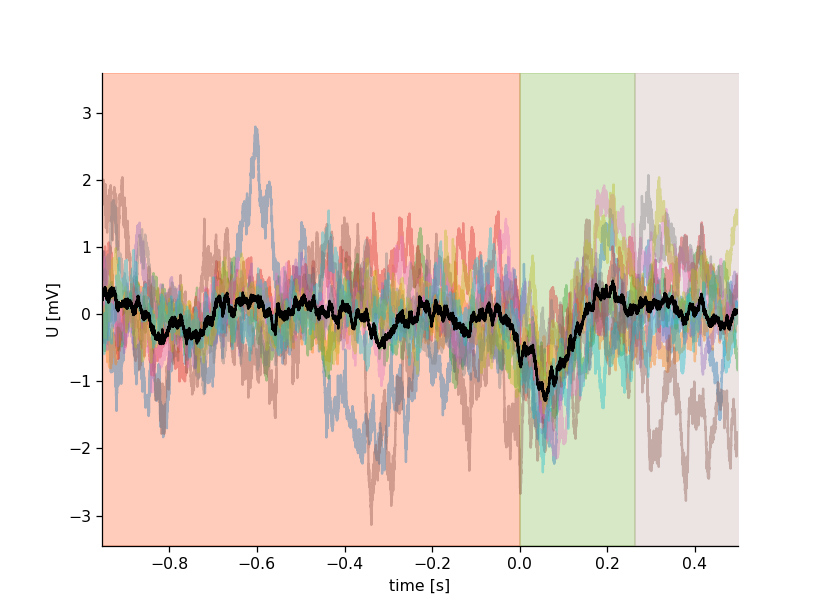

(-3.4587525497415204, 3.5935103200504916)

In [47]:
#raw data for given stimulus with mean as black line
f=plt.figure()
gid=2

temp=saFly.get_by_group(gid)[:,saFly.channelmap['ephys'],:] # retrieves all trials of given stimulus, select type
for t in temp:
    plt.plot(saRest.timeax[:t.size], t*100., alpha=0.4)
plt.plot( saFly.timeax[:saFly.meanSegments[gid].shape[1]], 
         saFly.meanSegments[gid][saFly.channelmap['ephys'],:]*100.,  color='k') #one of two ways to get average
plt.xlabel('time [s]')
plt.ylabel('U [mV]')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
y1,y2=plt.gca().get_ylim()

ori = saFly.stimulusPhases_inframes[1]*saFly.meanFramePeriod
# fill parts of the background to mark different parts of the stimulus
plt.gca().fill_between([saFly.stimulusPhases_inframes[0]*saRest.meanFramePeriod-ori, 
                  saFly.stimulusPhases_inframes[1]*saRest.meanFramePeriod-ori], 
                       [y1,y1],[y2,y2], alpha=0.3, color=[1.,.34,.13])
plt.gca().fill_between([saFly.stimulusPhases_inframes[1]*saRest.meanFramePeriod-ori, 
                        saFly.stimulusPhases_inframes[2]*saRest.meanFramePeriod-ori], 
                       [y1,y1],[y2,y2], alpha=0.3, color=[.48,.70,.26])
plt.gca().fill_between([saFly.stimulusPhases_inframes[2]*saRest.meanFramePeriod-ori, 
                        saFly.stimulusPhases_inframes[-1]*saRest.meanFramePeriod-ori], 
                       [y1,y1],[y2,y2], alpha=0.3, color=[.74,.66,.64])
plt.xlim([-ori, 1.45-ori])
plt.ylim([y1,y2])

## plot average

In [48]:
saRest.average_flywise()
saFly.average_flywise()

<IPython.core.display.Javascript object>


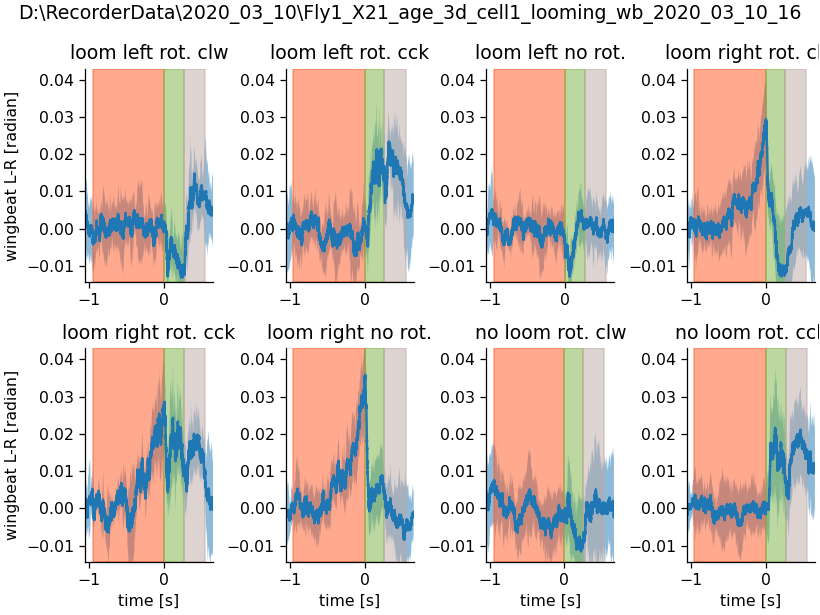

<IPython.core.display.Javascript object>

In [49]:
# built-in convenience function
saFly.plotMean('ephys')
saRest.plotMean('ephys')

<IPython.core.display.Javascript object>


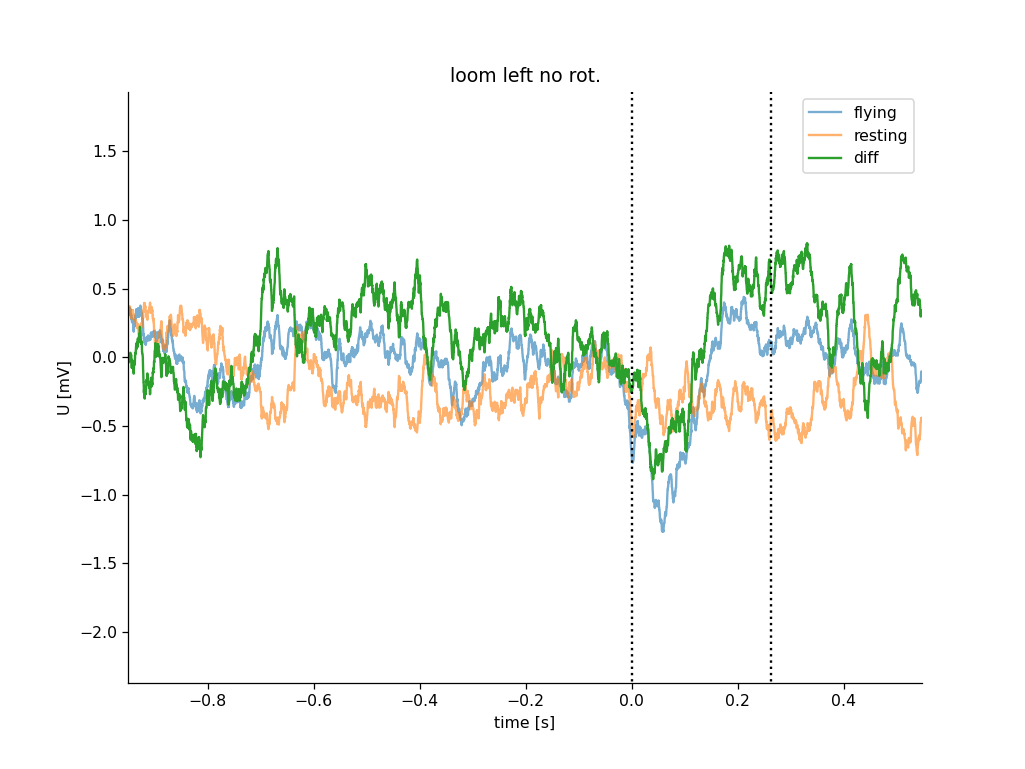

In [52]:
# comparison of resting vs flying for 1 stimulus
#INCLUDING DIFFERENCE

#saRest.average_flywise()
#saFly.average_flywise()

gid=2 # "groupID", which means stimulus type
incDiff=True
plotStimPhases=True
#datatype='wingDiff'
datatype='ephys'

f,ax=plt.subplots(1,1, figsize=(8,6))

flyMean = saFly.get_avg_data(datatype)[gid]*100. #conversion factor to get mV
flyStd = saFly.get_std_data(datatype)[gid]*100. #conversion factor to get mV

restMean = saRest.get_avg_data(datatype)[gid]*100.

minLen = min([flyMean.size, restMean.size])
diffMean = flyMean[:minLen]-restMean[:minLen]

#flyMean -= np.median(flyMean[flyMean.size//3:flyMean.size//2])
flyMean = signal.medfilt(flyMean, 11) #prettier for this plot, so it is less cluttered
#restMean -= np.median(restMean[restMean.size//3:restMean.size//2])
restMean = signal.medfilt(restMean, 11)

ax.plot(saFly.timeax[:flyMean.size], flyMean, alpha=1.-(0.4*incDiff), linewidth=1.5)
#plt.fill_between(saFly.timeax[:flyMean.size], flyMean+flyStd, flyMean-flyStd, alpha=0.3)
ax.plot(saRest.timeax[:restMean.size], restMean, alpha=1.-(0.4*incDiff), linewidth=1.5)
#plt.fill_between(saRest.timeax[:restMean.size], restMean+restStd, restMean-restStd, alpha=0.3)

if incDiff:
    ax.plot(saFly.timeax[:diffMean.size], signal.medfilt(diffMean,11), linewidth=1.5)

#saFly.plot_stimPhases(f)
ax.set_xlabel('time [s]')
ax.set_ylabel('U [mV]')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlim([-0.95,0.548])
#ax.set_ylim([-6,8])

plt.legend(['flying','resting'])
plt.title(saRest.get_stimulusmap(gid))
if plotStimPhases:
    #saFly.plot_stimPhases(f)
    demarcations = saFly.stimulusPhases_inframes
    y1,y2 = ax.get_ylim()
    for i in range(1,len(demarcations)-1):
        ax.plot([demarcations[i]*saFly.meanFramePeriod+saFly.timeax[0]+saFly.preStim]*2,[y1-2.,y2+2.], 'k:')
    ax.set_ylim([y1-1.,y2+1.])
if datatype=='wingDiff':
    ax.set_ylim([-0.2,0.6])
    ax.set_ylabel('$\Delta $WBA')
if incDiff:
    ax.legend(['flying','resting', 'diff'])
    #f.savefig(os.path.join(..., f'{saFly.flyID[0]}_incDiff_{datatype}.png'))
else:
    #f.savefig(os.path.join(..., f'{saFly.flyID[0]}_excDiff_{datatype}.png'))
    pass

### side-by-side plot of WBA and ephys

<IPython.core.display.Javascript object>


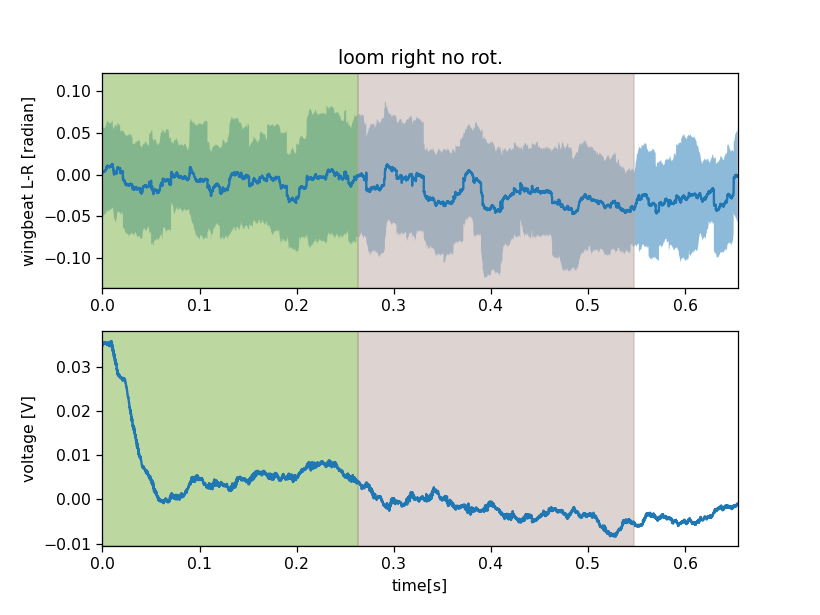

<IPython.core.display.Javascript object>


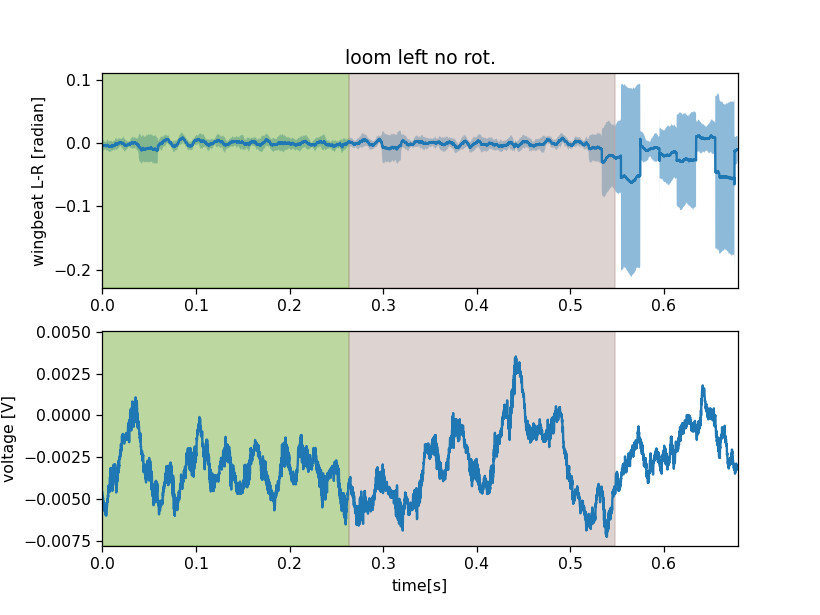

<AxesSubplot:xlabel='time[s]', ylabel='voltage [V]'>

In [53]:
saFly.plot_certain_stimgroup(5)
saRest.plot_certain_stimgroup(2)

## comparison of combined stimulus with the individual stims

In [64]:
def sum_individual_components(self, combined, candidates):
        f, ax=plt.subplots(2,1)
        # first handle the wingDiff data
        #avgWings = {k: v[self.channelmap['wingDiff']] for k,v in self.meanSegments.items()}
        avgWings = self.get_avg_data('wingDiff')
        ax[0].plot(self.timeax[:avgWings[combined].size], avgWings[combined])
        if len(avgWings[candidates[0]])<len(avgWings[candidates[1]]):
            toplotSum = avgWings[candidates[1]].copy()
            toplotSum[:len(avgWings[candidates[0]])] += avgWings[candidates[0]]
        else:
            toplotSum = avgWings[candidates[0]].copy()
            toplotSum[:len(avgWings[candidates[1]])] += avgWings[candidates[1]]
        [ax[0].plot(self.timeax[:avgWings[pC].size], avgWings[pC], alpha=0.7) for pC in candidates]
        ax[0].plot(self.timeax[:toplotSum.size], toplotSum)
        ax[0].set_xlim([-self.stimulusPhases_inframes[1]*self.meanFramePeriod ,0.45])
        #now the ephys data
        avgEphys = {k: v[self.channelmap['ephys']] for k,v in self.meanSegments.items()}
        ax[1].plot(self.timeax[:avgEphys[combined].size], avgEphys[combined])
        if len(avgEphys[candidates[0]])<len(avgEphys[candidates[1]]):
            toplotSum = avgEphys[candidates[1]].copy()
            toplotSum[:len(avgEphys[candidates[0]])] += avgEphys[candidates[0]]
        else:
            toplotSum = avgEphys[candidates[0]].copy()
            toplotSum[:len(avgEphys[candidates[1]])] += avgEphys[candidates[1]]
        [ax[1].plot(self.timeax[:avgEphys[pC].size], avgEphys[pC], alpha=0.7) for pC in candidates]
        ax[1].plot(self.timeax[:toplotSum.size], toplotSum)
        ax[1].set_xlim([-self.stimulusPhases_inframes[1]*self.meanFramePeriod ,0.45])
        plt.legend([self.stimulusmap[(combined+1)*0.5], self.stimulusmap[(candidates[0]+1)*0.5], self.stimulusmap[(candidates[1]+1)*0.5], 'addition'], fontsize=20)
        self.plot_stimPhases(f)
        return

<IPython.core.display.Javascript object>


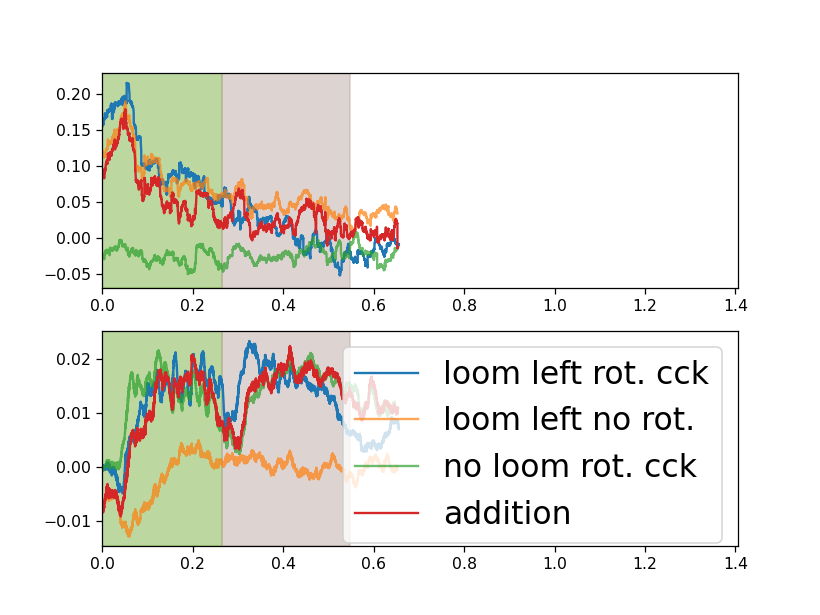

In [54]:
saFly.sum_individual_components(1,[2,7])

## batch  loading and make figure

In [66]:
#function definition of what should be run as batch, these are equivalent to the plots in previous cells

def compare_flight_rest(gid, saFly, saRest):
    flyMean = saFly.meanSegments[gid][0,:]
    restMean = saRest.meanSegments[gid][0,:]
    maxLen = max([flyMean.size, restMean.size])
    diffMean = np.pad( flyMean,(0,maxLen-flyMean.size),'constant',constant_values=np.nan ) - np.pad( restMean,(0,maxLen-restMean.size), 'constant',constant_values=np.nan )
    return diffMean

def makeComparisonPlot(saFly, saRest, stimIDs=range(6)):
    saRest.average_flywise()
    saFly.average_flywise()
    #colors = ['#3bb143', '#0b6623', '#708238', '#4f7942', '#043927'] #shades of green
    #colors = ['#111e6c', '#0e4d92', '#4682b4', '#0f52ba', '#6593f5'] #shades of blue
    colors=['#3bb143', '#0b6623', '#708238', '#4682b4', '#0f52ba', '#6593f5'  , '#777777', '#888888']
    f,ax=plt.subplots()
    for i in stimIDs:
        tmp=compare_flight_rest(i, saFly, saRest)
        ax.plot(saFly.timeax[:tmp.size], tmp*100., color=colors[i])
    ax.set_xlabel('time [s]')
    ax.set_ylabel('U [mV]')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    y1,y2 = ax.get_ylim()
    ax.axvline(0, linestyle=':', color='k')
    ax.set_ylim([y1-1.,y2+1.])
    #plt.ylim([-4.95, 4.9])
    plt.legend([saFly.get_stimulusmap(i) for i in stimIDs])
    return f,ax

In [ ]:
blacklist=[]
datatype='ephys'
joinFlies = False

saFly = None
saRest = None
for root, fname in frequentflyers:
#for root, fname in saccLeft_hyPol:
    root = os.path.join(DATAPATH,root)
    print(os.path.join(root,fname+'looming_wb__flying.neomat'))
    print(os.path.join(root,fname+'looming_wb__resting.neomat'))
    tempFly = lwb.Looming_with_background_Analyzer.retrieveFromNeomatfile(
                            os.path.join(root,fname+'looming_wb__flying.neomat'))
    tempRest = lwb.Looming_with_background_Analyzer.retrieveFromNeomatfile(
                            os.path.join(root,fname+'looming_wb__resting.neomat'))
    tempFly.average_flywise()
    tempRest.average_flywise()
    if not tempFly.timeax[0] < -tempFly.preStim*1.01:
        tempFly.timeax -= tempFly.stimulusPhases_inframes[1]*tempFly.meanFramePeriod
    if not tempRest.timeax[0] < -tempRest.preStim*1.01:
        tempRest.timeax -= tempRest.stimulusPhases_inframes[1]*tempRest.meanFramePeriod
    
    # this shows how to take advantage of the Analyzer class to merge data from individuals using '+' operator
    if joinFlies:
        helperLibrary.resampleAnalyzer(tempFly)
        helperLibrary.resampleAnalyzer(tempRest)
        if saFly is None:
            saFly = tempFly
            saRest = tempRest
        else:
            saFly = saFly + tempFly
            saRest = saRest + tempRest
    else:
        saFly = tempFly
        saRest = tempRest
    print('ran through')
    
    # show how to make plots as a batch job in this loop
    if not joinFlies:
        # plot the diff of membrane potetntial flying VS resting and wingDiff for all looming stimuli
        f,ax = makeComparisonPlot(saFly, saRest)
        f.suptitle(saFly.flyID[0])


# example of what to do with all these flies
if joinFlies:
    saFly.plot



D:\RecorderData\2020_04_20\Fly4_X21_age_3d_cell1_looming_wb__flying.neomat
D:\RecorderData\2020_04_20\Fly4_X21_age_3d_cell1_looming_wb__resting.neomat
ran through


<IPython.core.display.Javascript object>

D:\RecorderData\2020_04_17\Fly3_X21_age_5d_cell1_looming_wb__flying.neomat
D:\RecorderData\2020_04_17\Fly3_X21_age_5d_cell1_looming_wb__resting.neomat
ran through


<IPython.core.display.Javascript object>

D:\RecorderData\2020_04_15\Fly3_X21_age_3d_cell1_looming_wb__flying.neomat
D:\RecorderData\2020_04_15\Fly3_X21_age_3d_cell1_looming_wb__resting.neomat
ran through


<IPython.core.display.Javascript object>

D:\RecorderData\2020_03_16\Fly1_X20a_age_3d_cell1_looming_wb__flying.neomat
D:\RecorderData\2020_03_16\Fly1_X20a_age_3d_cell1_looming_wb__resting.neomat
ran through


<IPython.core.display.Javascript object>

D:\RecorderData\2020_01_29\Fly1_U29xG16_age_5d_cell1_looming_wb__flying.neomat
D:\RecorderData\2020_01_29\Fly1_U29xG16_age_5d_cell1_looming_wb__resting.neomat
ran through


<IPython.core.display.Javascript object>

D:\RecorderData\2020_01_29\Fly3_U29xG16_age_5d_cell1_looming_wb__flying.neomat
D:\RecorderData\2020_01_29\Fly3_U29xG16_age_5d_cell1_looming_wb__resting.neomat
ran through


In [ ]:
# average traces of flying resp rest or all

groups = [saRest,saFly]

f,ax=plt.subplots(2,3, figsize=(11,6))
ax=ax.flatten()
for i in range(6):
    for j in range(2):
        a=groups[j]
        d = a.meanSegments[i][0]*100.
        s = a.stdSegments[i][0]*100.
        ax[i].plot(a.timeax[:d.size], d)
        ax[i].fill_between(a.timeax[:d.size], d+s, d-s, alpha=0.5)
    demarcations = a.stimulusPhases_inframes
    y1,y2 = ax[i].get_ylim()
    for k in range(1,len(demarcations)-1):
        ax[i].plot([(demarcations[k]*a.meanFramePeriod+a.preStim)+a.timeax[0]]*2,[y1-2.,y2+2.], 'k:')
    ax[i].set_ylim([y1-1.,y2+1.])
    #ax[i].set_ylim([y1-0.1,y2+0.1])
    ax[i].set_title(a.get_stimulusmap(i))
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    #ax[i].set_xlim([-0.95,0.548])

ax[3].set_xlabel('time [s]')
ax[4].set_xlabel('time [s]')
ax[5].set_xlabel('time [s]')
ax[0].set_ylabel('U [mV]')
ax[3].set_ylabel('U [mV]')
#ax[0].set_ylabel('$\Delta$ WBA')
#ax[3].set_ylabel('$\Delta$ WBA')
ax[0].legend(['rest', 'flight'])

plt.tight_layout()

## make plots on collections hyperpol Y/N

### comparison plot of average traces

OF ALL FLIES AND HYPERPOLARIZATION VISIBLE YES/NO

DOING IT FOR FLYING AND RESTING SEPARATELY

<IPython.core.display.Javascript object>


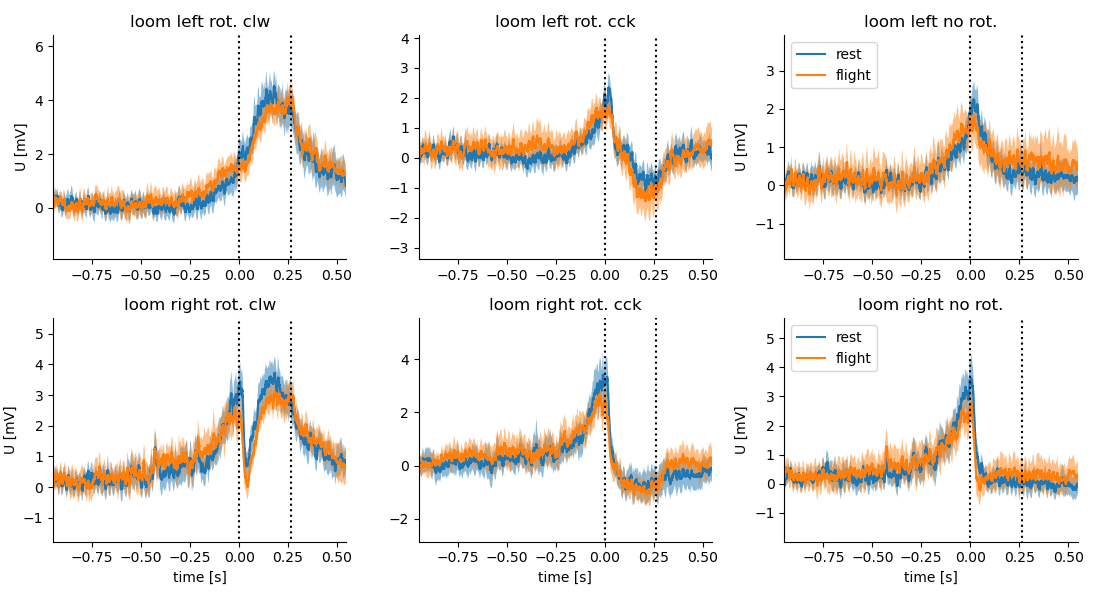

In [149]:
# average traces of flying resp rest or all
#yesFly.average_flywise()
#noFly.average_flywise()
#allFly.average_flywise()
#yesRest.average_flywise()
#noRest.average_flywise()
#allRest.average_flywise()'''

#fly = [yesFly, noFly]
#rest = [yesRest, noRest]
#inGroup = [yesRest,yesFly]
outGroup=[noRest,noFly]

f,ax=plt.subplots(2,3, figsize=(11,6))
ax=ax.flatten()
for i in range(6):
    for j in range(2):
        a=outGroup[j]
        d = a.meanSegments[i][0]*100.
        s = a.stdSegments[i][0]*100.
        ax[i].plot(a.timeax[:d.size], d)
        ax[i].fill_between(a.timeax[:d.size], d+s, d-s, alpha=0.5)
    demarcations = a.stimulusPhases_inframes
    y1,y2 = ax[i].get_ylim()
    for k in range(1,len(demarcations)-1):
        ax[i].plot([(demarcations[k]*a.meanFramePeriod+a.preStim)+a.timeax[0]]*2,[y1-2.,y2+2.], 'k:')
    ax[i].set_ylim([y1-1.,y2+1.])
    #ax[i].set_ylim([y1-0.1,y2+0.1])
    ax[i].set_title(a.get_stimulusmap(i))
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].set_xlim([-0.95,0.548])
ax[3].set_xlabel('time [s]')
ax[4].set_xlabel('time [s]')
ax[5].set_xlabel('time [s]')
ax[0].set_ylabel('U [mV]')
ax[3].set_ylabel('U [mV]')
#ax[0].set_ylabel('$\Delta$ WBA')
#ax[3].set_ylabel('$\Delta$ WBA')

ax[5].set_ylabel('U [mV]')
ax[2].set_ylabel('U [mV]')
#ax[2].set_ylabel('$\Delta$ WBA')
#ax[5].set_ylabel('$\Delta$ WBA')
#ax[0].legend(['all flies','hyperpol. Yes', 'hyperpol. No'])
#ax[0].legend(['hyperpol. Yes', 'hyperpol. No'])
ax[5].legend(['rest', 'flight'])
ax[2].legend(['rest', 'flight'])
#ax[0].legend(['atypical', 'stereotypical'])
#f.suptitle('average membrane voltage during rest in subgroups of flies')

plt.tight_layout()

<IPython.core.display.Javascript object>


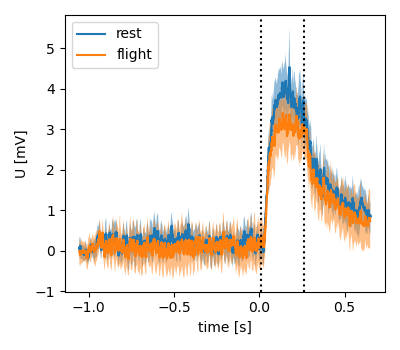

In [157]:
stimID=6
f,ax=plt.subplots(1,1, figsize=(4,3.5))
#d = yesRest.meanSegments[stimID][-1]
#s = yesRest.stdSegments[stimID][-1]
d = noRest.meanSegments[stimID][0]*100.
s = noRest.stdSegments[stimID][0]*100
ax.plot(yesRest.timeax[:d.size], d)
ax.fill_between(yesRest.timeax[:d.size], d+s, d-s, alpha=0.5)
#d = yesFly.meanSegments[stimID][-1]
#s = yesFly.stdSegments[stimID][-1]
d = noFly.meanSegments[stimID][0]*100.
s = noFly.stdSegments[stimID][0]*100.
ax.plot(yesRest.timeax[:d.size], d)
ax.fill_between(yesRest.timeax[:d.size], d+s, d-s, alpha=0.5)
ax.legend(['rest', 'flight'], loc='upper left')
ax.set_xlabel('time [s]')
ax.set_ylabel('U [mV]')
#ax.set_ylabel('$\Delta$ WBA [rad]')
ax.axvline(0.01, linestyle=':', color='k')
ax.axvline(0.26, linestyle=':', color='k')
plt.tight_layout()

In [49]:
# average traces of flying resp rest or all
yesFly.average_flywise()
noFly.average_flywise()
allFly.average_flywise()
yesRest.average_flywise()
noRest.average_flywise()
allRest.average_flywise()

fly = [allFly, yesFly, noFly]
rest = [allRest, yesRest, noRest]

f,ax=plt.subplots(2,3)
ax=ax.flatten()
for i in range(6):
    for j in range(3):
        a=rest[j]
        d = a.meanSegments[i][0]
        ax[i].plot(a.timeax[:d.size], 100.*d)
    demarcations = a.stimulusPhases_inframes
    y1,y2 = ax[i].get_ylim()
    for k in range(1,len(demarcations)-1):
        ax[i].plot([(demarcations[k]*a.meanFramePeriod+a.preStim)+a.timeax[0]]*2,[y1-2.,y2+2.], 'k:')
    ax[i].set_ylim([y1-1.,y2+1.])
    ax[i].set_title(a.get_stimulusmap(i))
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].set_xlim([-0.95,0.548])
ax[3].set_xlabel('time [s]')
ax[4].set_xlabel('time [s]')
ax[5].set_xlabel('time [s]')
ax[0].set_ylabel('U [mV]')
ax[3].set_ylabel('U [mV]')
ax[0].legend(['all flies','hyperpol. Yes', 'hyperpol. No'])
f.suptitle('average membrane voltage during rest in subgroups of flies')

NameError: name 'allFly' is not defined

In [118]:
# DIFF of average traces of flying-rest visible or all
yesFly.average_flywise()
noFly.average_flywise()
allFly.average_flywise()
yesRest.average_flywise()
noRest.average_flywise()
allRest.average_flywise()

fly = [allFly, yesFly, noFly]
rest = [allRest, yesRest, noRest]

f,ax=plt.subplots(2,3)
ax=ax.flatten()
for i in range(6):
    for j in range(3):
        a=rest[j]
        d = 100.*compare_flight_rest(i,fly[j],rest[j])
        ax[i].plot(a.timeax[:d.size], d)
    demarcations = a.stimulusPhases_inframes
    y1,y2 = ax[i].get_ylim()
    for k in range(1,len(demarcations)-1):
        ax[i].plot([(demarcations[k]*a.meanFramePeriod+a.preStim)+a.timeax[0]]*2,[y1-2.,y2+2.], 'k:')
    ax[i].set_ylim([y1-1.,y2+1.])
    ax[i].set_title(a.get_stimulusmap(i))
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].set_xlim([-0.95,0.548])
ax[3].set_xlabel('time [s]')
ax[4].set_xlabel('time [s]')
ax[5].set_xlabel('time [s]')
ax[0].set_ylabel('U [mV]')
ax[3].set_ylabel('U [mV]')
ax[0].legend(['all flies','hyperpol. Yes', 'hyperpol. No'])
f.suptitle('diff flying vs rest on mean traces per stim on subcollections of flies')

AttributeError: 'Figure' object has no attribute 'suptilte'